In [31]:
from alpaca_trade_api.rest import REST, TimeFrame
from datetime import datetime, timedelta
import math
import time
import pandas as pd

In [17]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [18]:
API_KEY = "PKD4UCRDJVUWYQHYXA65"
SECRET_KEY = "LvtOt8c9JIEgTg2EADmbxUIzFmBseudfWAi9qTo7"
BASE_URL = "https://paper-api.alpaca.markets"

api = REST(API_KEY, SECRET_KEY, BASE_URL)

In [21]:
# Same as the function in the random version
def get_position(symbol):
    positions = api.list_positions()
    for p in positions:
        if p.symbol == symbol:
            return float(p.qty)
    return 0

In [22]:
# Description is given in the article
def get_pause():
    now = datetime.now()
    next_min = now.replace(second=0, microsecond=0) + timedelta(minutes=1)
    pause = math.ceil((next_min - now).seconds)
    print(f"Sleep for {pause}")
    return pause

In [23]:
# Returns a series with the moving average
def get_sma(series, periods):
    return series.rolling(periods).mean()

In [24]:
# Get up-to-date 1 minute data from Alpaca and add the moving averages
def get_bars(symbol):
    bars = api.get_crypto_bars(symbol, TimeFrame.Minute).df
    bars = bars[bars.exchange == 'CBSE']
    bars[f'sma_fast'] = get_sma(bars.close, SMA_FAST)
    bars[f'sma_slow'] = get_sma(bars.close, SMA_SLOW)
    return bars

In [76]:
crypto_tickers = ['AAVEUSD', 'ALGOUSD', 'BATUSD', 'BCHUSD', 'BTCUSD', 'DAIUSD', 'ETHUSD', 'LINKUSD', 'LTCUSD', 'MATICUSD', 'MKRUSD', 'NEARUSD', 'PAXGUSD', 'SOLUSD', 'TRXUSD', 'USDTUSD ', 'WBTCUSD'] 
stocks_tickers = ['SPY', 'QQQ', 'IWM', 'VTI', 'VOO', 'VO', 'VB', 'VEA', 'VWO', 'XLF ', 'XLV', 'XLE', 'XLY', 'XLC', 'XLK', 'XLI', 'XLP', 'XLB', 'XLU', 'XLRE']
commodities_tickers = ['GLD', 'SLV', 'USO', 'UNG', 'DBA', 'DBC', 'GSG', 'IAU ', 'PPLT', 'SIVR', 'MOO', 'NIB', 'JO', 'JJG', 'WEAT', 'UGA', 'DBE', 'REMX', 'OIL']
bonds_tickers = ['AGG', 'BND', 'TLT', 'IEF', 'SHY', 'LQD', 'HYG', 'JNK', 'MUB', 'TIP', 'BNDX', 'EMB', 'VWOB', 'PFF', 'BKLN', 'FLOT', 'GSY', 'SCHO', 'SCHR', 'SCHZ']

In [77]:
portfolio = {"AAVEUSD": 0.001761, "ETHUSD": 0.027927, "MATICUSD": 0.049049, "MKRUSD": 0.001555, "NEARUSD": 0.000261, "PAXGUSD": 0.009694, "SOLUSD": 0.007786,
"VB": 0.004787, "VOO": 0.015501, "VWO": 0.001423, "XLE": 0.060197, "XLF": 0.004755, "XLK": 0.013660, "XLU": 0.038099, "XLV": 0.057729,
"DBA": 0.183636, "JJG": 0.117333, "PPLT": 0.038550, "REMX": 0.095354, "UGA": 0.252229, "UNG": 0.003079, "FLOT": 0.004705, "HYG": 0.006670, "PFF": 0.002847, "TIP": 0.001038, "TLT": 0.000155, "VWOB": 0.000218}
portfolio

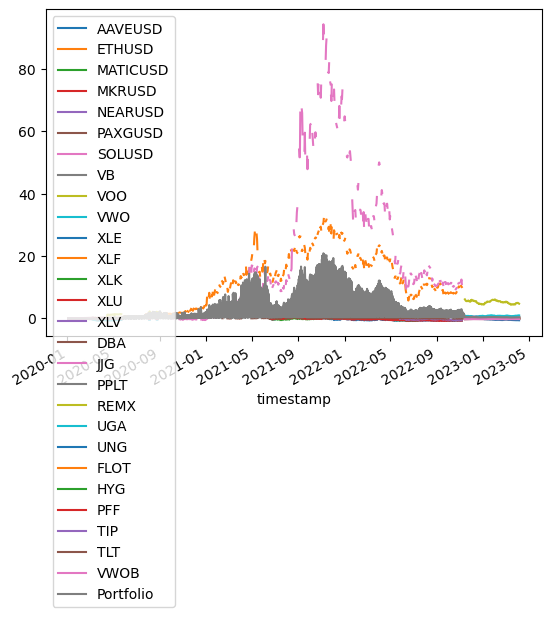

In [83]:
returns = {}
# start="2000-01-01"
# end="2023-04-06"

for sym in portfolio:
  
  if (sym in crypto_tickers):
    bars = api.get_crypto_bars(sym, TimeFrame.Day, "2020-01-01", "2023-04-06", exchanges=["FTXU"]).df
  else:
    bars = api.get_bars(sym, TimeFrame.Day, "2020-01-01", "2023-04-06").df
    
  bars['daily_return'] = bars['close'].pct_change()  
  cumulative_return = bars['daily_return'].add(1).cumprod().sub(1).dropna()
  returns[sym] = cumulative_return

df = pd.DataFrame(returns)

df['Portfolio'] = df.mean(axis=1)

df.plot()